# Aula 7
## Operações aritméticas com imagens
* Operações +, -, * e /, entre duas imagens ou entre uma imagem e um escalar.
Aplicações incluem:
* Eliminação de ruídos;
* Melhora da qualidade visual;
* Controle de qualidade;
* Detecção de movimentos;
* Realce de alvos;
* Escala de cor;
* Nitidez e brilho;
* etc.

## Soma
* Soma entre duas imagens faz uma operação pixel-a-pixel;
* Soma entre uma imagem e um escalar soma cada pixel da imagem com o escalar;
* Principais usos são redução de ruídos, blending e HDR;
* É importante considerar que cada valor pode estar entre 0 e 255, e extrapolar este limite pode causar um **overflow** (valor ultrapassa limite de 255).

[ 82  63 126]


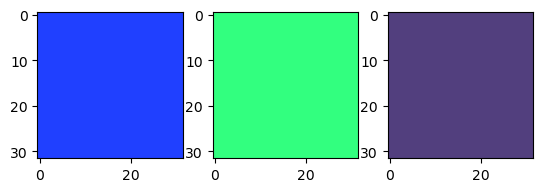

In [1]:
import numpy as np
import matplotlib.pyplot as plt

img1 = np.zeros((32, 32, 3), dtype=np.uint8)
img1[:, :] = (32, 64, 255)

img2 = np.zeros((32, 32, 3), dtype=np.uint8)
img2[:, :] = (50, 255, 127)

# Resultado "esperado": (82, 319, 382)
# Resultado obtido: (82, 63, 126)

img3 = img1 + img2
print(img3[0, 0])

plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.subplot(1, 3, 3)
plt.imshow(img3)

Uma forma de resolvermos este problema é dividir os valores da imagem por 2, obtendo um valor entre 0 e 255 novamente.

[ 41 159 191]


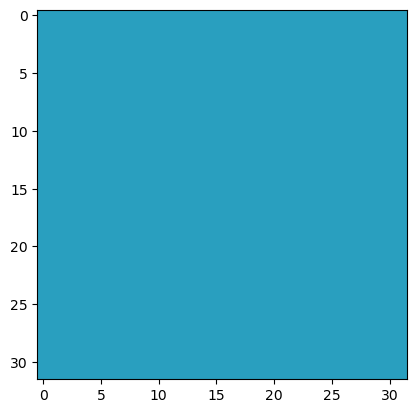

In [2]:
img4 = (img1.astype(np.float64) + img2.astype(np.float64)) / 2
img4 = img4.astype(np.uint8)
print(img4[0, 0])
plt.imshow(img4)

### - Redução de ruídos
Caso se tenha várias amostras de uma mesma imagem, podemos eliminar ruído fazendo uma média aritmética entre as imagens.

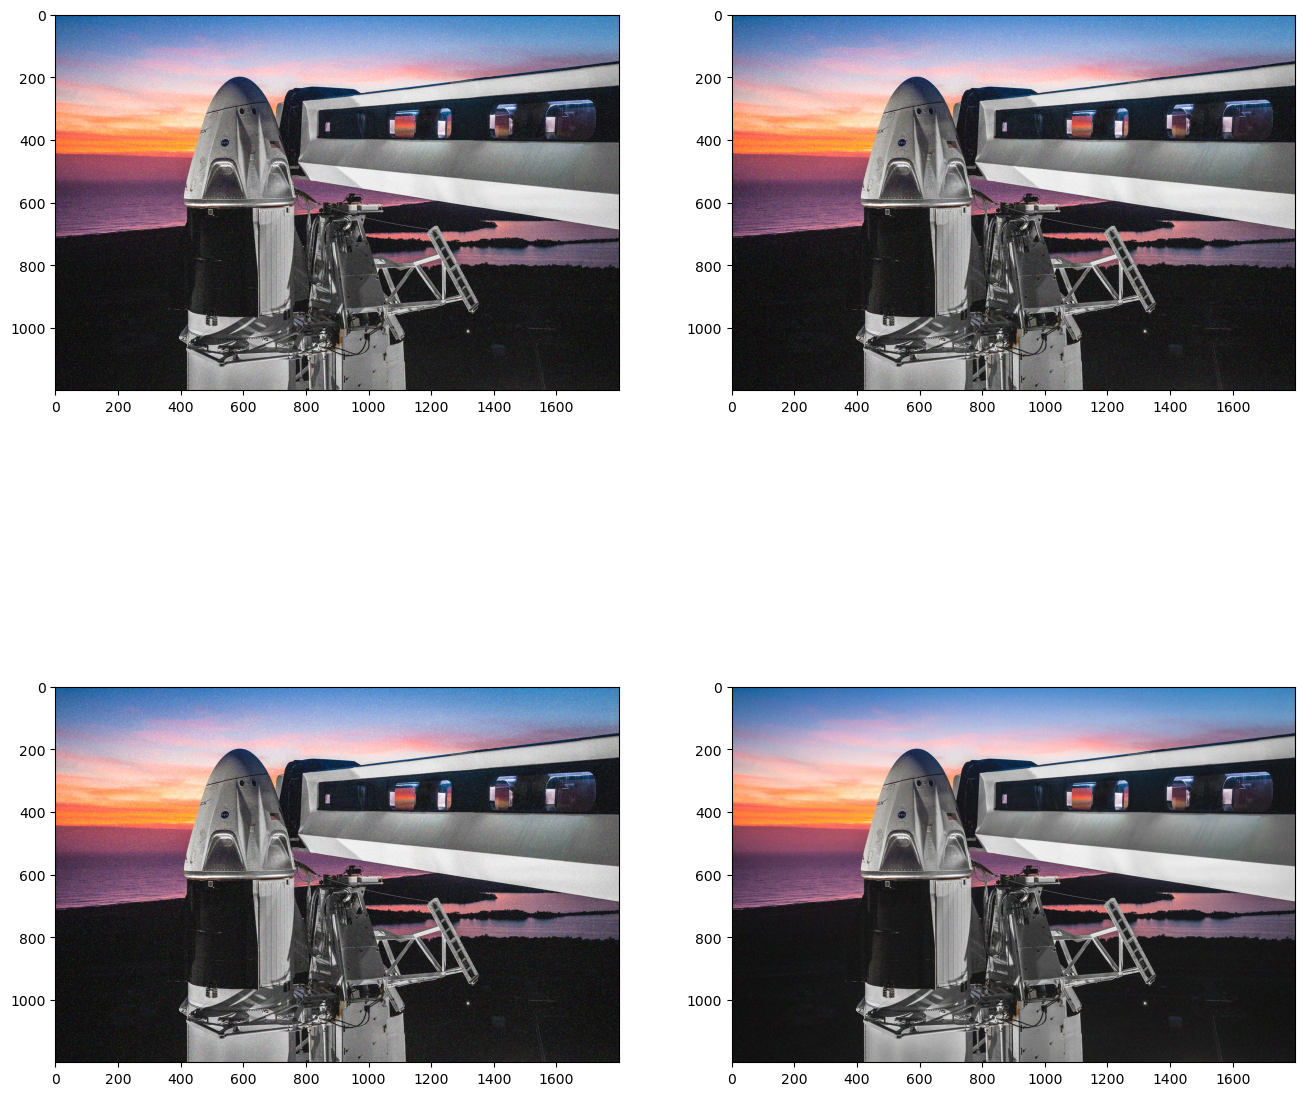

In [4]:
from PIL import Image

space_1 = np.array(Image.open('space_1_noise.png'))
space_2 = np.array(Image.open('space_2_noise.png'))
space_3 = np.array(Image.open('space_3_noise.png'))
space_4 = np.array(Image.open('space_4_noise.png'))
space_avg = ( space_1.astype(np.float64)
            + space_2.astype(np.float64)
            + space_3.astype(np.float64)
            + space_4.astype(np.float64)) / 4
space_avg = space_avg.astype(np.uint8)
Image.fromarray(space_avg).save('space_avg.png')

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(space_1)
plt.subplot(2, 2, 2)
plt.imshow(space_2)
plt.subplot(2, 2, 3)
plt.imshow(space_3)
plt.subplot(2, 2, 4)
plt.imshow(space_avg)

### - HDR (High-Dynamic-Range)
Utilizado frequentemente em fotografia, o HDR (Grande Alcance Dinâmico ou Ampla Faixa Dinâmica) é um método para permitir a codificação de uma faixa maior de luminosidade em imagens (razão entre o valor mais claro e mais escuro da imagem), permitindo melhorar a iluminação da cena.

### - Blending
* Blending é a mistura/combinação de duas imagens;
* O coeficiente das imagens é a influência de cada pixel na mistura.
```python
imagem_blending = (C * img_1) + ((1 - C) * img_2)
imagem_blending = imagem_blending.astype(np.uint8)
```

## Subtração
* Subtração entre duas imagens faz uma operação pixel-a-pixel;
* Subtração entre uma imagem e um escalar soma cada pixel da imagem com o escalar;
* Principais usos são detecção de movimento, subtração de variação de iluminação, controle de qualidade e realce;
* É importante considerar que cada valor pode estar entre 0 e 255, e extrapolar este limite pode causar um **underflow** (valor fica abaixo de 0).

[238  65 128]


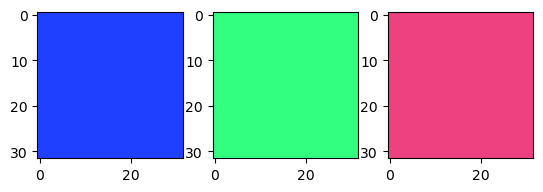

In [5]:
img1 = np.zeros((32, 32, 3), dtype=np.uint8)
img1[:, :] = (32, 64, 255)
img2 = np.zeros((32, 32, 3), dtype=np.uint8)
img2[:, :] = (50, 255, 127)

# Resultado "esperado": (-18, -191, 128)
# Resultado obtido: (238, 65, 128)
img3 = img1 - img2
print(img3[0, 0])

plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.subplot(1, 3, 3)
plt.imshow(img3)

Uma solução tanto para o **overflow** quanto o **underflow** é converter as imagens para um tipo apropriado e utilizar a função `np.clip(minha_imagem, 0, 255)`, que opera da seguinte forma para cada pixel:
```
se valor < 0:
    valor = 0
senão se valor > 255:
    valor = 255```

[  0   0 128]


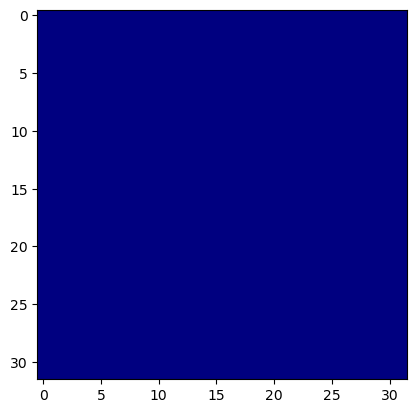

In [7]:
img1 = np.zeros((32, 32, 3), dtype=np.uint8)
img1[:, :] = (32, 64, 255)
img2 = np.zeros((32, 32, 3), dtype=np.uint8)
img2[:, :] = (50, 255, 127)

img4 = img1.astype(np.int16) - img2.astype(np.int16) # ou np.float64
img4 = np.clip(img4, 0, 255)
print(img4[0, 0])
plt.imshow(img4)

### - Detecção de movimento
* Dadas duas imagens de uma cena, pode-se evidenciar a mudança de posição de um objeto em relação aos seus arredores;
* Funciona melhor quando as imagens são obtidas **sequencialmente**.

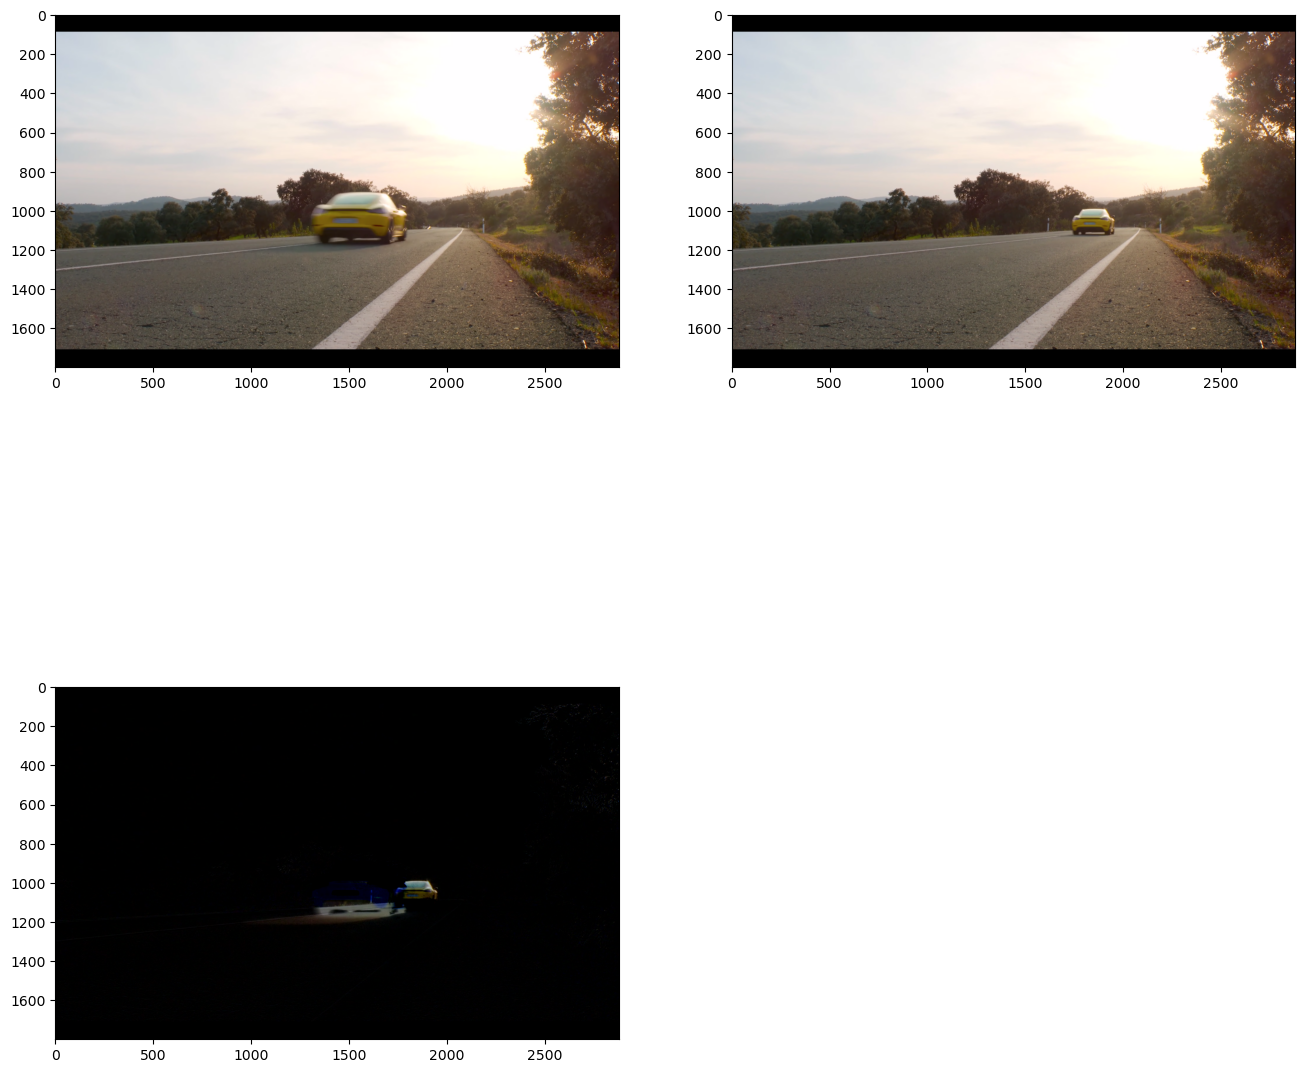

In [9]:
car1 = np.array(Image.open('car1.png'))[:, :, :3] # remover canal alfa
car2 = np.array(Image.open('car2.png'))[:, :, :3] # remover canal alfa
mvt = car2.astype(np.int16) - car1.astype(np.int16)
mvt = np.clip(mvt, 0, 255).astype(np.uint8)

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(car1)
plt.subplot(2, 2, 2)
plt.imshow(car2)
plt.subplot(2, 2, 3)
plt.imshow(mvt)

## Multiplicação e divisão
* Podemos utilizar multiplicação para sobrepor duas imagens (imagem com imagem), destacar as cores (imagem com escalar) ou adicionar um efeito de fluorescência (imagem com imagem ou com escalar) ou adicionar uma tintura (imagem com escalar);
* Podem causar overflow e underflow;
* Frequentemente, trabalha-se com imagens na faixa de valor \[0, 1\].

### - Sobreposição de imagens

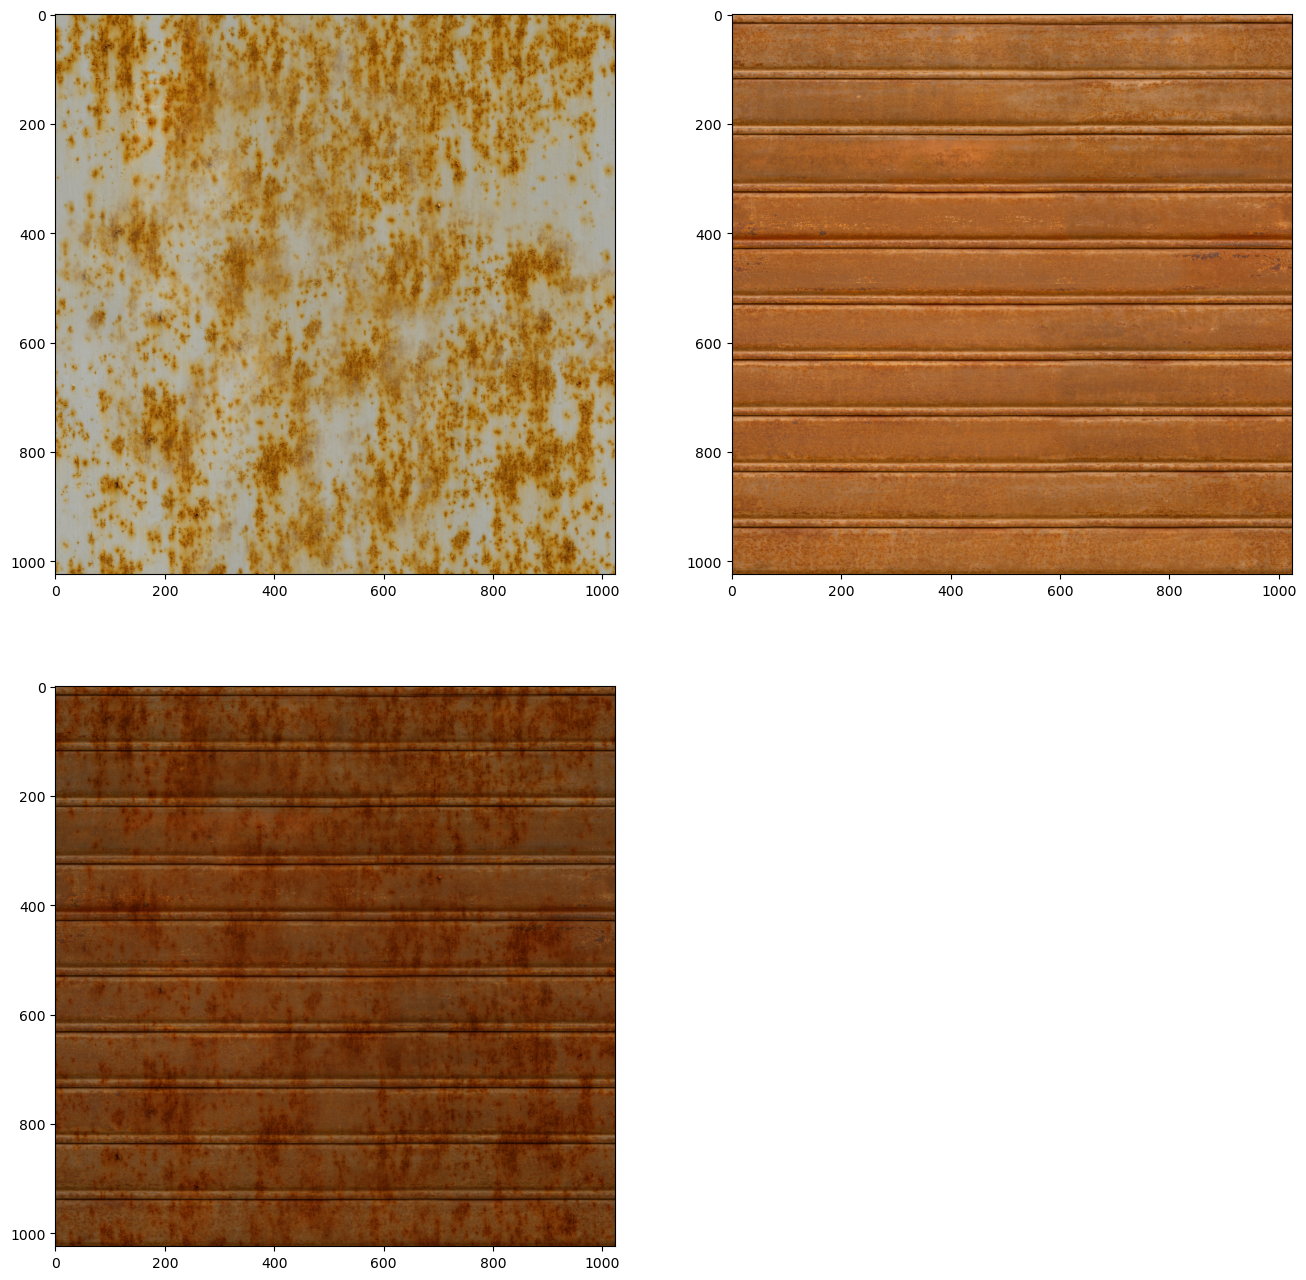

In [10]:
metal_1 = np.array(Image.open('rusty_metal_02_diff_1k.jpg'))
metal_2 = np.array(Image.open('rusty_metal_diff_1k.jpg'))

sobreposta = (metal_1.astype(np.float64) / 255) * (metal_2.astype(np.float64) / 255)
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(metal_1)
plt.subplot(2, 2, 2)
plt.imshow(metal_2)
plt.subplot(2, 2, 3)
plt.imshow(sobreposta)

#Tintura

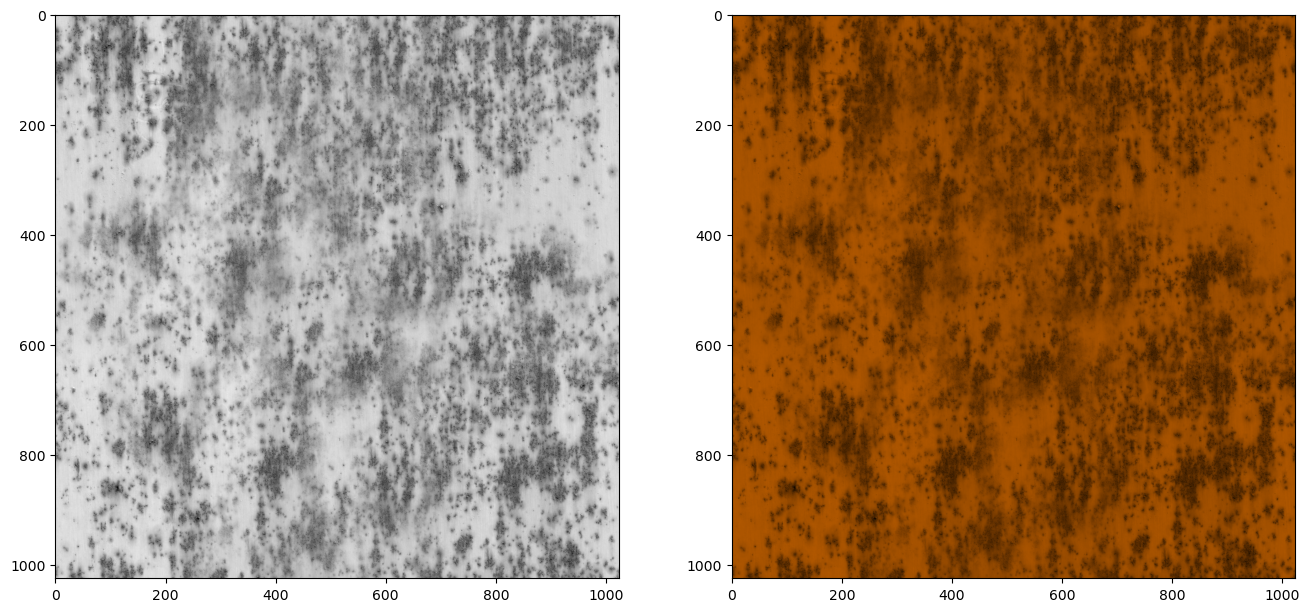

In [11]:
grayscale = np.average(metal_1, axis=2)
tinted = np.zeros(shape=metal_1.shape, dtype=np.uint8)

# laranja em RGB: (255, 127, 0)
# escala vermelho em 255 / 255 = 1
tinted[:, :, 0] = grayscale * (255 / 255)
# escala verde em 127 / 255 ~= 0.5
tinted[:, :, 1] = grayscale * (127 / 255)
# escala azul em 0 / 255 = 0
tinted[:, :, 2] = grayscale * (  0 / 255)

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(grayscale, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(tinted)

# Realce de cor

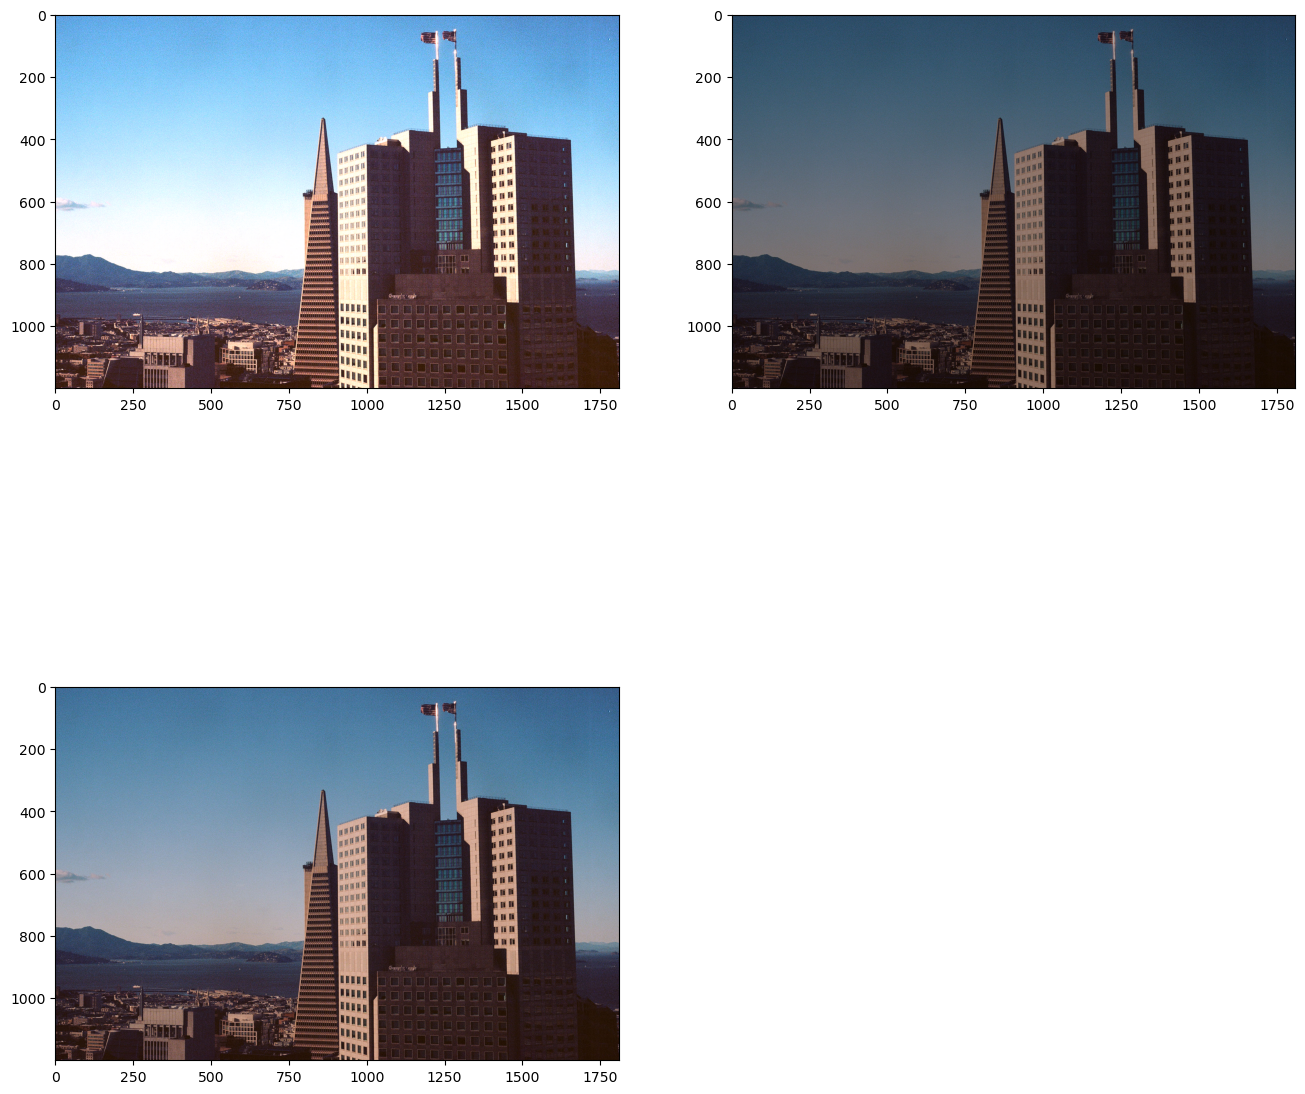

In [12]:
photo = np.array(Image.open('photo.jpg'))

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
photo_mul = np.clip(photo * 1.5, 0, 255).astype(np.uint8)
plt.imshow(photo_mul)

plt.subplot(2, 2, 2)
photo_div = (photo / 1.5).astype(np.uint8)
plt.imshow(photo_div)

plt.subplot(2, 2, 3)
plt.imshow(photo)